# Data Analysis on Lok Sabha Election Reports

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Setting display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Loading data from an Excel file with error handling
try:
    df = pd.read_excel('lokdata.xlsx')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'lokdata.xlsx' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Display the first few rows of the dataframe to verify loading
print(df.head())

# Optional: Set a theme for seaborn for better aesthetics
sns.set_theme(style="whitegrid")

# Now you can proceed with your data analysis and visualization tasks


Data Cleaning and Preparation

In [2]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 State            0
Winning Party    0
Total Seats      0
dtype: int64


In [3]:
#We checked for missing values but there are no missing values found in the data so no need for data cleaning

EDA

In [4]:
print("First few rows of the DataFrame:")
print(df.head())
print()

First few rows of the DataFrame:
                       State                 Winning Party  Total Seats
0  Andaman & Nicobar Islands  Bharatiya Janata Party - BJP            1
1             Andhra Pradesh            Telugu Desam - TDP           25
2          Arunachal Pradesh  Bharatiya Janata Party - BJP            2
3                      Assam  Bharatiya Janata Party - BJP           14
4                      Bihar   Janata Dal (United) - JD(U)           40



In [5]:
print("Summary statistics for Total Seats:")
print(df['Total Seats'].describe())
print()

Summary statistics for Total Seats:
count    35.000000
mean     15.400000
std      17.765134
min       1.000000
25%       2.000000
50%      10.000000
75%      25.000000
max      80.000000
Name: Total Seats, dtype: float64



In [6]:
#Describes about the dataset
#we found the values of mean,standard deviation , minimun and maximum values with three percentile values
#The total number of seats ranges from a minimum of 1 seat to a maximum of 80 seats.
#The median (50th percentile) number of seats is 10, which suggests that half of the entities have 10 seats or fewer.
#The standard deviation (17.77) reflects the dispersion of seat values around the mean.
#The 25th percentile (Q1) is 2 seats, indicating that 25% of entities have 2 seats or fewer.
#The 75th percentile (Q3) is 25 seats, suggesting that 75% of entities have 25 seats or fewer.

In [7]:
df.shape

(35, 3)

In [8]:
#We found out that there are 35 rows and 3 columns in there.

In [9]:
print("Basic information about the DataFrame:")
print(df.info())
print()

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          35 non-null     object
 1   Winning Party  35 non-null     object
 2   Total Seats    35 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes
None



In [10]:
#Using info we get to know basic information from the data set
#The DataFrame consists of 35 entries across 3 columns: State, Winning Party, and Total Seats.
#All columns have 35 non-null entries, indicating no missing data, which ensures data completeness and reliability.
#State Column: Contains names of 35 distinct entities (likely states or regions).
#Winning Party Column: Represents the political party that won in each state.
#Total Seats Column: Numerical data (integers) indicating the total number of seats allocated per state.

In [11]:
print("Number of unique values in State and Winning Party columns:")
print(df[['State', 'Winning Party']].nunique())
print()

Number of unique values in State and Winning Party columns:
State            35
Winning Party    13
dtype: int64



In [14]:
# Find the row with the maximum value of 'Total Seats'
max_seats_row = df.loc[df['Total Seats'].idxmax()]

# Extracting details
max_seats = max_seats_row['Total Seats']
max_state = max_seats_row['State']
max_party = max_seats_row['Winning Party']

# Print the result
print(f"The maximum number of seats ({max_seats}) was won in {max_state} by the {max_party} party.")

The maximum number of seats (80) was won in Uttar Pradesh by the Samajwadi Party - SP party.


In [34]:
# Find the row with the minimum value of 'Total Seats'
min_seats_row = df.loc[df['Total Seats'].idxmin()]

# Extracting details
min_seats = min_seats_row['Total Seats']
min_state = min_seats_row['State']
min_party = min_seats_row['Winning Party']

# Print the result
print(f"The minimum number of seats ({min_seats}) was won in {min_state} by the {min_party} party.")


The minimum number of seats (1) was won in Andaman & Nicobar Islands by the Bharatiya Janata Party - BJP party.


Corelation Analysis

Correlation Matrix:
             Total Seats
Total Seats          1.0



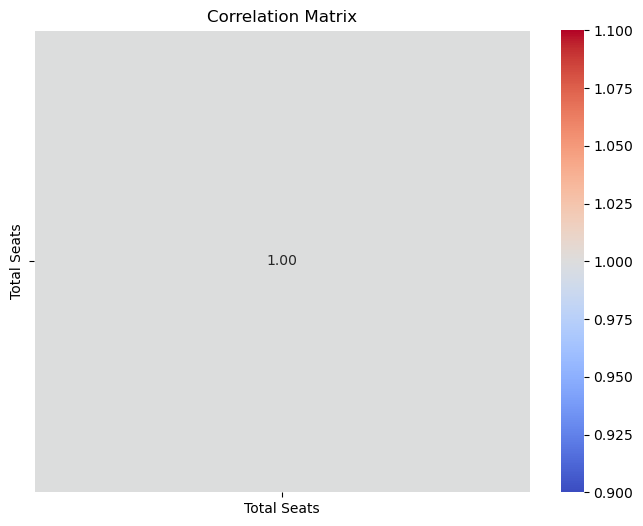

In [16]:
# Calculate correlation matrix, handling only numeric columns
corr_matrix = df.select_dtypes(include=[float, int]).corr()

# Print correlation matrix
print("Correlation Matrix:")
print(corr_matrix)
print()

# Plotting correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()


In [17]:
#We will get the corelation matrix in this way because , corelation matrix is drawn between numericals, as there are no numericals here corelation matrix does not show us anything.

Party performance analysis

In [18]:
import pandas as pd

# Assuming 'df' is your DataFrame with columns: State, Winning Party, Total Seats

# Calculate total seats won by each party
party_seat_counts = df.groupby('Winning Party')['Total Seats'].sum().reset_index()

# Sort parties by total seats in descending order
party_seat_counts_sorted = party_seat_counts.sort_values(by='Total Seats', ascending=False)

# Print total seats won by each party
print("Total seats won by each party:")
print(party_seat_counts_sorted)
print()


Total seats won by each party:
                                        Winning Party  Total Seats
1                        Bharatiya Janata Party - BJP          206
5                      Indian National Congress - INC           87
8                                Samajwadi Party - SP           80
0                 All India Trinamool Congress - AITC           40
7                         Janata Dal (United) - JD(U)           40
3                     Dravida Munnetra Kazhagam - DMK           39
10                                 Telugu Desam - TDP           25
2   Bharatiya Janata Party - BJP/Indian National C...           12
6   Jammu & Kashmir National Conference - JKN/Bhar...            5
11  Voice of the People Party - VOTPP/Indian Natio...            2
4                                   Independent - IND            1
9                      Sikkim Krantikari Morcha - SKM            1
12                      Zoram People’s Movement - ZPM            1



In [19]:
# Calculate percentage of seats held by each party nationally
total_seats = df['Total Seats'].sum()
party_seat_counts['Percentage of Total Seats'] = (party_seat_counts['Total Seats'] / total_seats) * 100

# Print percentage of seats held by each party nationally
print("Percentage of seats held by each party nationally:")
print(party_seat_counts)
print()


Percentage of seats held by each party nationally:
                                        Winning Party  Total Seats  \
0                 All India Trinamool Congress - AITC           40   
1                        Bharatiya Janata Party - BJP          206   
2   Bharatiya Janata Party - BJP/Indian National C...           12   
3                     Dravida Munnetra Kazhagam - DMK           39   
4                                   Independent - IND            1   
5                      Indian National Congress - INC           87   
6   Jammu & Kashmir National Conference - JKN/Bhar...            5   
7                         Janata Dal (United) - JD(U)           40   
8                                Samajwadi Party - SP           80   
9                      Sikkim Krantikari Morcha - SKM            1   
10                                 Telugu Desam - TDP           25   
11  Voice of the People Party - VOTPP/Indian Natio...            2   
12                      Zoram People’s 

In [20]:
# Calculate percentage of seats held by each party per state
state_party_seat_counts = df.groupby(['State', 'Winning Party'])['Total Seats'].sum().reset_index()
state_total_seats = df.groupby('State')['Total Seats'].sum().reset_index()

# Merge state_party_seat_counts with state_total_seats to calculate percentage
state_party_seat_counts = pd.merge(state_party_seat_counts, state_total_seats, on='State', suffixes=('_party', '_total'))
state_party_seat_counts['Percentage of State Seats'] = (state_party_seat_counts['Total Seats_party'] / state_party_seat_counts['Total Seats_total']) * 100

# Print percentage of seats held by each party per state
print("Percentage of seats held by each party per state:")
print(state_party_seat_counts)


Percentage of seats held by each party per state:
                        State  \
0   Andaman & Nicobar Islands   
1              Andhra Pradesh   
2           Arunachal Pradesh   
3                       Assam   
4                       Bihar   
5                  Chandigarh   
6                Chhattisgarh   
7                       Delhi   
8                         Goa   
9                     Gujarat   
10                    Haryana   
11           Himachal Pradesh   
12          Jammu and Kashmir   
13                  Jharkhand   
14                  Karnataka   
15                     Kerala   
16                     Ladakh   
17                Lakshadweep   
18             Madhya Pradesh   
19                Maharashtra   
20                    Manipur   
21                  Meghalaya   
22                    Mizoram   
23                   Nagaland   
24                     Odisha   
25                 Puducherry   
26                     Punjab   
27                  Rajast

Visualization

In [30]:
#Basic Visuvalizations like barchart,pie chart,stacked bar chart,box plot

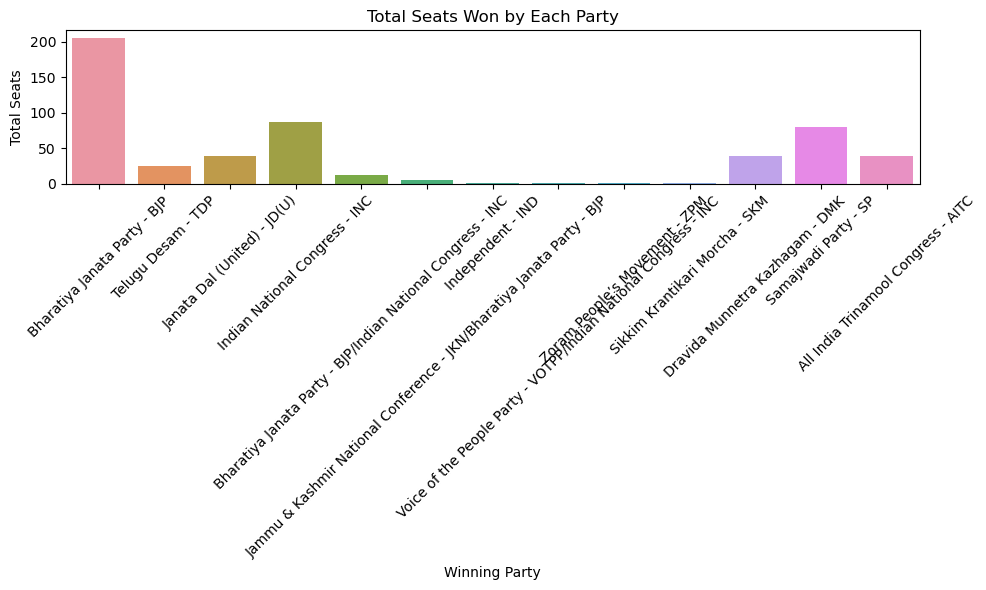

In [31]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Winning Party', y='Total Seats', data=df, estimator=sum, ci=None)
plt.title('Total Seats Won by Each Party')
plt.xlabel('Winning Party')
plt.ylabel('Total Seats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Bharatiya Janata Party (BJP) seems to have won the most seats.
#Followed by the alliance between BJP and INC, and then the INC alone.

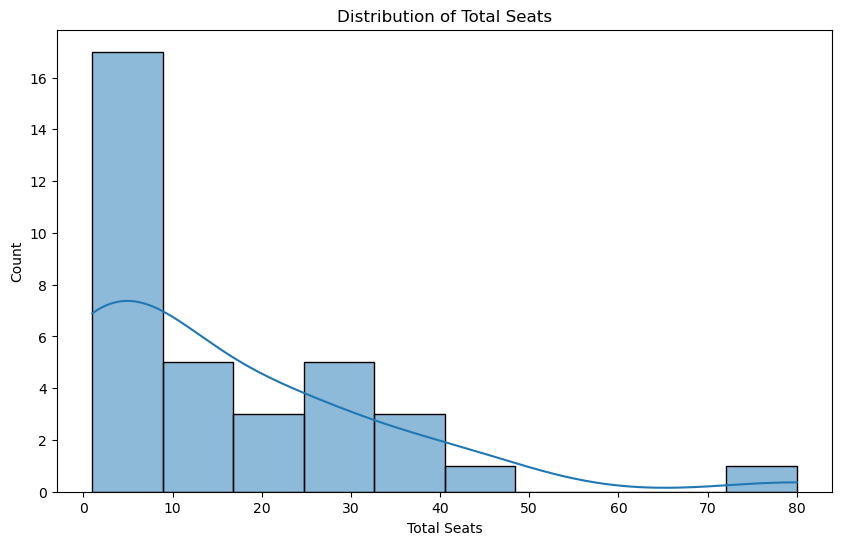

In [32]:
# Histogram of Total Seats
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Seats'], bins=10, kde=True)
plt.title('Distribution of Total Seats')
plt.xlabel('Total Seats')
plt.ylabel('Count')
plt.show()


In [ ]:
#The number of seats won by the most of the parties are from 0-10.
#The value of seats won decreases up to 20-20 and then suddenly increases.
#From 30 the number of seats won decreases again and count almost stays dead untli the number of seats won reaches 70-80

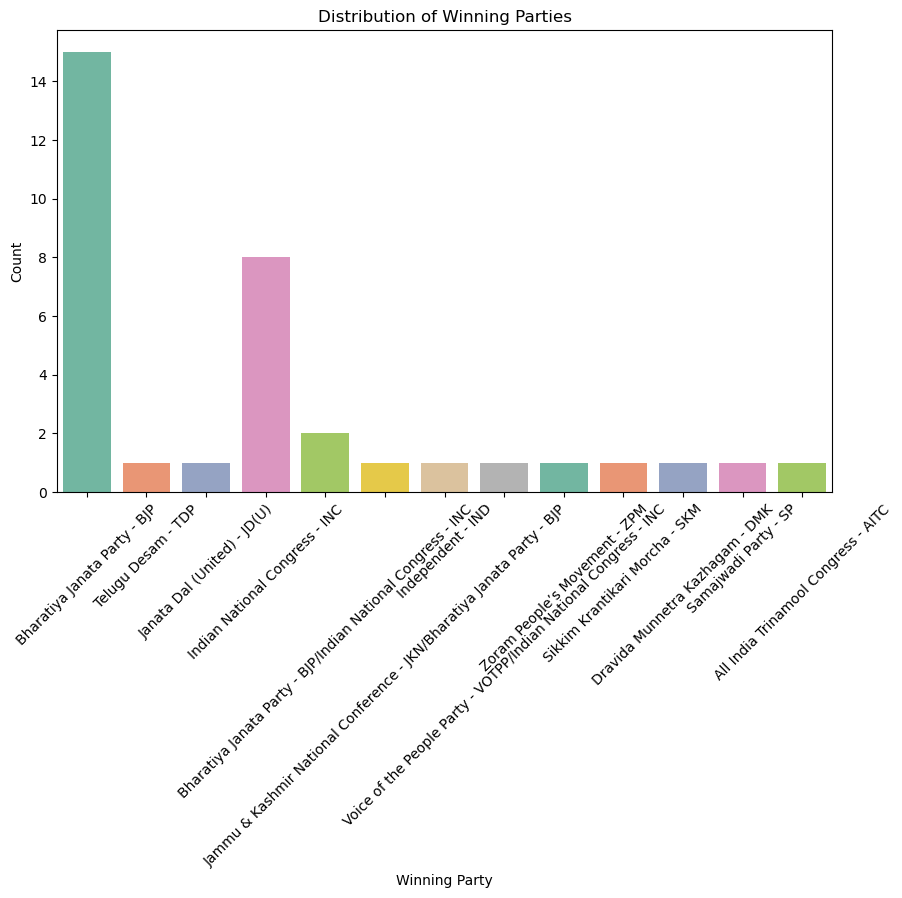

In [33]:
# Countplot of Winning Party
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Winning Party', palette='Set2')
plt.title('Distribution of Winning Parties')
plt.xlabel('Winning Party')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Bharatiya Janata Party (BJP) and Indian National Congress (INC) are the two most frequent winners.
#Followed by Telugu Desam (TDP), Janata Dal (United) (JD(U)), and Independents (IND).


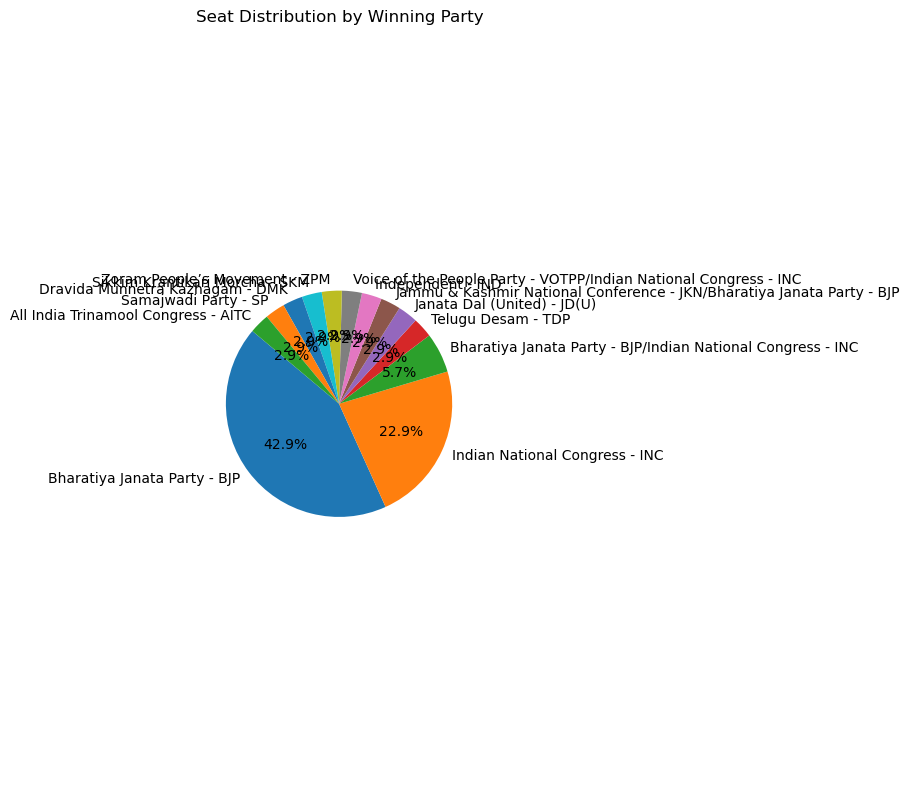

In [35]:
#Pie chart
plt.figure(figsize=(8, 8))
party_counts = df['Winning Party'].value_counts()
plt.pie(party_counts, labels=party_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Seat Distribution by Winning Party')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [ ]:
# The Bharatiya Janata Party (BJP) has the largest slice, which means it received the biggest percentage of votes (42.9%).

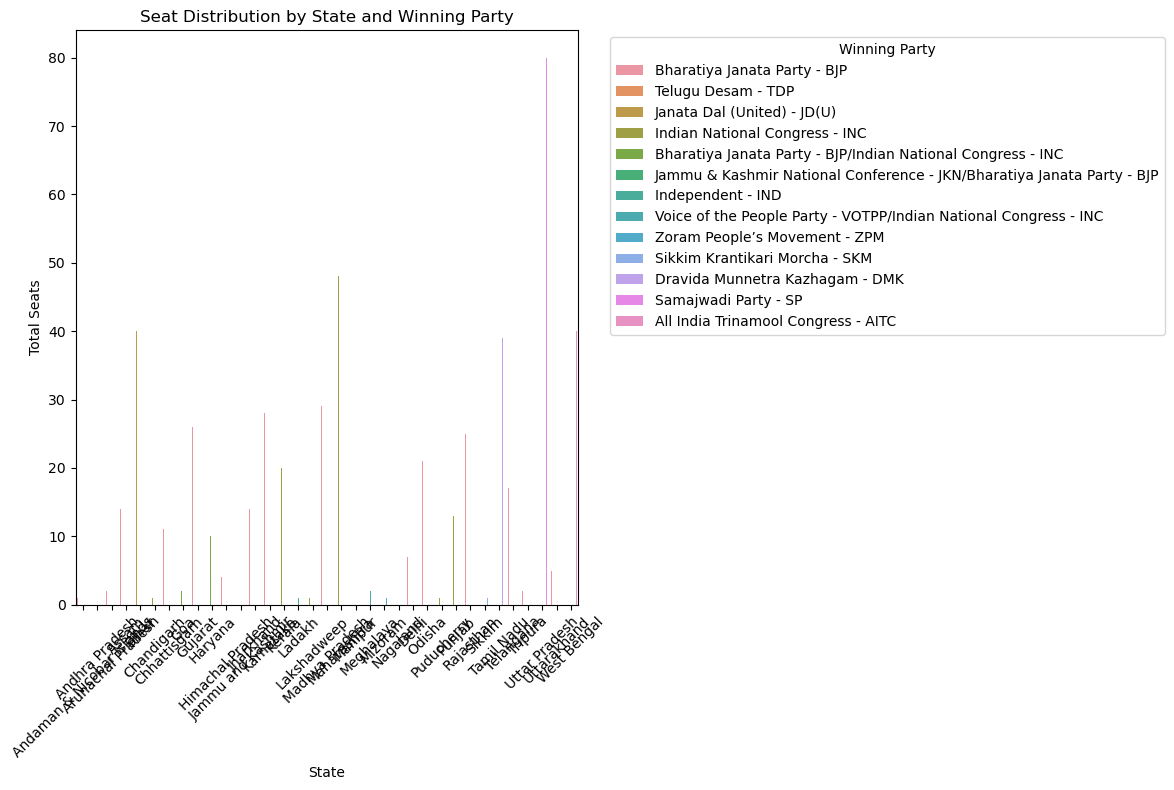

In [37]:
#Stacked bar chart for seat distribution by state and party
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Total Seats', hue='Winning Party', data=df, estimator=sum, ci=None)
plt.title('Seat Distribution by State and Winning Party')
plt.xlabel('State')
plt.ylabel('Total Seats')
plt.xticks(rotation=45)
plt.legend(title='Winning Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


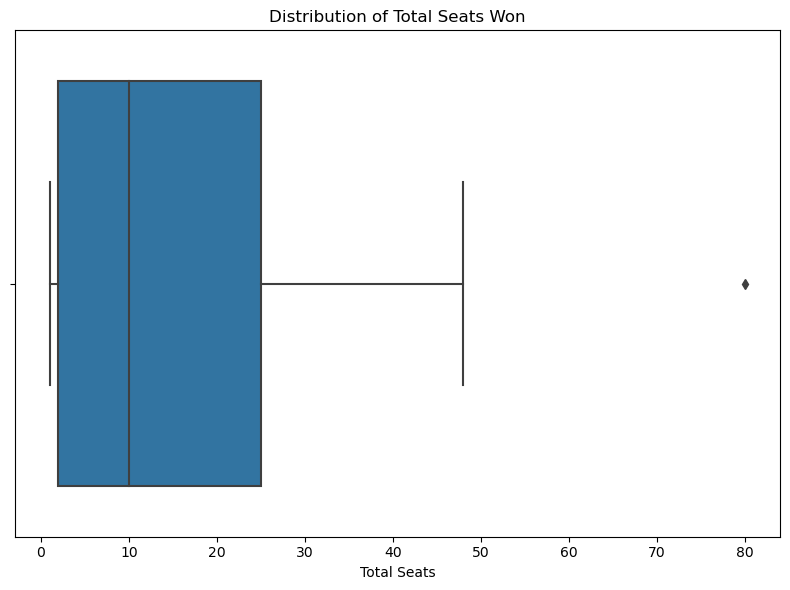

In [39]:
#Box plot for distribution of total seats won
plt.figure(figsize=(8, 6))
sns.boxplot(x='Total Seats', data=df, orient='h')
plt.title('Distribution of Total Seats Won')
plt.xlabel('Total Seats')
plt.tight_layout()
plt.show()


In [40]:
#From the box plot we can conclude that most number of seats won are in 20-30 and other peak is 60-70.

In [41]:
#In conclusion, the comprehensive analysis of political seat allocations across states reveals insightful patterns and trends,
#providing valuable strategic insights for stakeholders. 
#This project not only highlights the dominant parties and their regional strengths 
#but also lays the foundation for informed decision-making and future explorations in political dynamics.